In [1]:
import pandas as pd
import numpy as np
import import_ipynb
import Classes 


# Visualize

import matplotlib.pyplot as plt
from termcolor import colored
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import seaborn as sns


from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from scipy.stats import shapiro


#Classification Algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Regression Algorithms

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor




importing Jupyter notebook from Classes.ipynb


C:\Users\Asiye\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
data = pd.read_csv("hmelq.csv")

<ul>
    <li>BAD: 1 = applicant defaulted on loan or seriously delinquent; 0 = applicant paid loan</li>
<li>LOAN: Amount of the loan request</li>
<li>MORTDUE: Amount due on existing mortgage</li>
<li>VALUE: Value of current property</li>
<li>REASON: DebtCon = debt consolidation; HomeImp = home improvement</li>
<li>JOB: Occupational categories</li>
<li>YOJ: Years at present job</li>
<li>DEROG: Number of major derogatory reports</li>
<li>DELINQ: Number of delinquent credit lines</li>
<li>CLAGE: Age of oldest credit line in months</li>
<li>NINQ: Number of recent credit inquiries</li>
<li>CLNO: Number of credit lines</li>
    </ul>

In [3]:
information = Classes.Information(data)
information.data_features()

--------------------------  DATA HEAD --------------------------

   bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0    0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1    0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2    0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3    0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4    0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26.354  
3   1.0  11.0   33.992  
4   0.0  11.0   32.327  

--------------------------  DATA DESCRIBE --------------------------

          count           mean           std      min       25%        50%  \
bad      3576.0       0.199385      0.399594     0.00      0.00      0.000   
loan     3576.0   18529.697987  11262.834060  1100.00  11000.00  16200.000  

In [4]:
data['bad'].value_counts()

0    2863
1     713
Name: bad, dtype: int64

# Görselleştirme

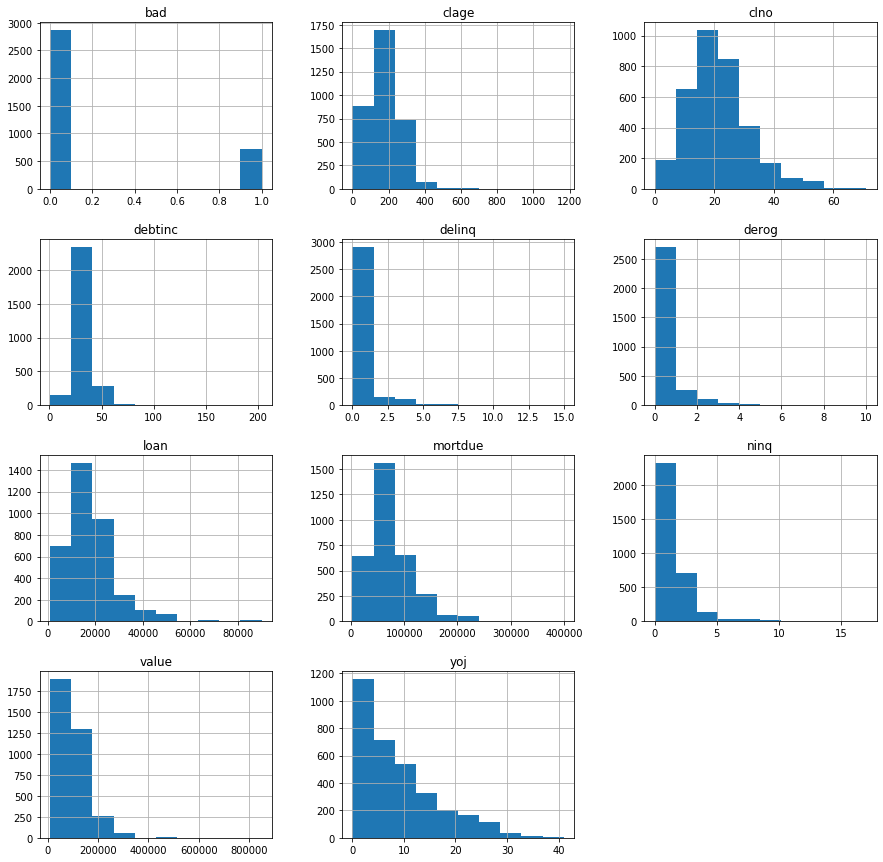

In [5]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
data.hist(ax=ax)
plt.show()

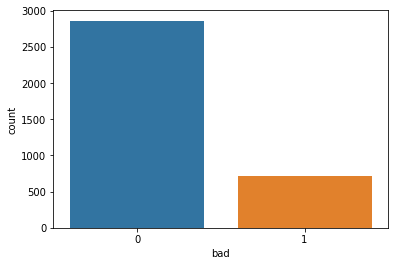

In [6]:
sns.countplot(x = 'bad', data = data)
plt.show()

In [7]:
count_no_sub = len(data[data['bad']==0])
count_sub = len(data[data['bad']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Kredisini Ödeyenler : %", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("Kredisini Ödemeyenler : %", pct_of_sub*100)

Kredisini Ödeyenler : % 80.06152125279642
Kredisini Ödemeyenler : % 19.938478747203582


In [8]:
data.groupby('bad').mean()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,,,,,,,,,,
0,18931.645127,75242.395117,102394.448489,9.031378,0.140732,0.238263,186.338950,1.032692,21.552536,33.179142
1,16915.708275,69029.488140,95308.460184,8.067533,0.716012,1.174888,153.497474,1.780089,21.323572,40.881416


# Yorum : 

<ul>
    <li>Kredisini ödeyenlerin( bad =0) , kredi talep miktarı ortalamasının(loan), kredisini ödemeyenlerin(bad =1) kredi talep miktarı ortalamasından yüksektir. Bu durumda kredisini ödeyebilenler yüksek kredi talebinde bulunmuştur diyebiliriz</li>
  <li> Negatif rapor sayıları fazla olan bireylerin (derog) çoğukredisini ödememiştir.</li>
    <li> Kredilerini ödeyen bireylerin borç/gelir oranı (debtinc) , kredilerini ödeyemeyen bireylerden daha düşüktür</li>
</ul>

In [9]:
# Kategorik değişkenlerin gruplandırılması

data.groupby('job').mean()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
job,,,,,,,,,,,
Mgr,0.232104,19084.598698,83964.704189,108464.106133,8.919318,0.320707,0.594203,174.285822,1.517564,23.097561,35.307687
Office,0.131810,18048.857645,68058.197973,94675.024670,8.103011,0.136905,0.445076,178.784840,0.936803,21.425795,34.158283
Other,0.232006,18006.918239,60064.432343,84251.694202,9.403457,0.313281,0.417183,174.026556,1.333836,19.572139,34.260072
ProfEx,0.166884,18750.717080,92690.971376,128851.319683,8.731349,0.203911,0.376871,196.769973,0.949728,24.503989,32.622049
Sales,0.348485,15251.515152,79856.864407,105960.969231,7.476667,0.450000,0.274194,202.301667,0.772727,24.272727,38.326064
Self,0.295652,27923.478261,102575.392523,147150.513274,7.210185,0.221239,0.551402,176.590526,1.404040,24.271930,36.824762


<ul>
    <li>Mesleklere göre kredi talep miktarları değişmektedir.(loan)</li>
</ul>

In [10]:
data.groupby('reason').mean()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
reason,,,,,,,,,,,
DebtCon,0.185576,19868.705188,74483.615277,101611.714495,8.551114,0.261098,0.409427,176.176174,1.343708,22.287742,34.301599
HomeImp,0.230624,15892.911153,73308.909702,100007.497760,9.411429,0.245596,0.455852,185.208453,0.845361,19.905273,33.496014


<ul>
    <li>Ev kredisi alanların kredi talep tutarları , borç kredisi alanların kredi talep tutarlarından düşüktür.(loan)</li>
</ul>


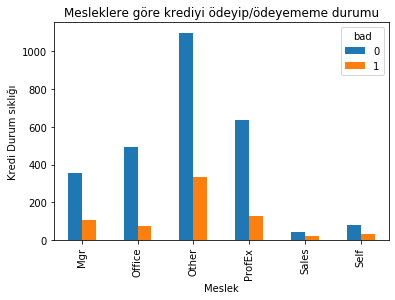

In [11]:
pd.crosstab(data.job,data.bad).plot(kind='bar')
plt.title('Mesleklere göre krediyi ödeyip/ödeyememe durumu')
plt.xlabel('Meslek')
plt.ylabel('Kredi Durum sıklığı')
plt.savefig('purchase_fre_job')

<ul>
    <li>Krediyi ödeyebilme(bad = 0) , büyük ölçüde mesleklere bağlı .Dolayısıyla iş unvanı, sonuç değişkeninin iyi bir öngörücüsü olabilir.</li>
    </ul>

Text(0, 0.5, 'Kredi Durum oranı')

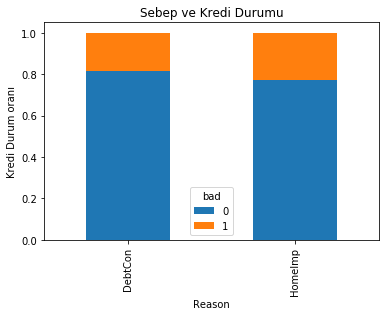

In [12]:
table=pd.crosstab(data.reason,data.bad)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Sebep ve Kredi Durumu')
plt.xlabel('Reason')
plt.ylabel('Kredi Durum oranı')


<ul><li>Kredi talep sebebi , y değişkeni (Bad) için güçlü bir yorumlayıcı görünmemektedir.</li></ul>

Text(0, 0.5, 'BAD')

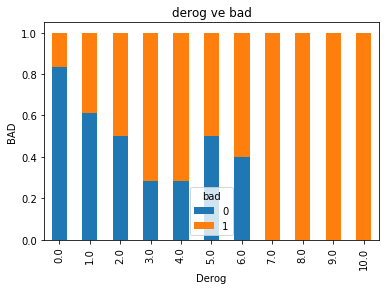

In [13]:
table=pd.crosstab(data.derog,data.bad)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('derog ve bad')
plt.xlabel('Derog')
plt.ylabel('BAD')


<ul><li>Negatif raporlara sahip bireylerin kredilerini ödeyip ödeyememelerinde iyi bir öngörücü olabilir</li></ul>

# Preprocess

In [14]:
p = Classes.Preprocess(data)
p.get_missing_values()

------------  Missing Values  -------------


debtinc    767
derog      427
delinq     351
mortdue    314
yoj        312
ninq       303
clage      179
job        167
reason     147
clno       133
value       64
loan         0
bad          0
dtype: int64

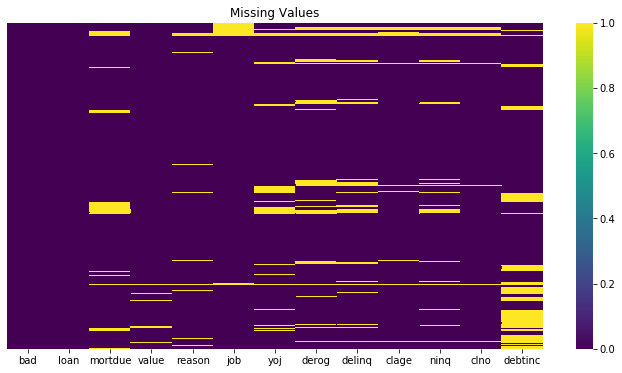

In [15]:
# Visualize Missing Values

v = Classes.Visualizer()
v.missing_values(data)

In [16]:
# Missing Value lar temizlendi
p.drop('any')

Drop Öncesi Data Shape -->    (3576, 13)
Drop Sonrası Data Shape -->    (2018, 13)
------------  Missing Values  -------------


debtinc    0
clno       0
ninq       0
clage      0
delinq     0
derog      0
yoj        0
job        0
reason     0
value      0
mortdue    0
loan       0
bad        0
dtype: int64

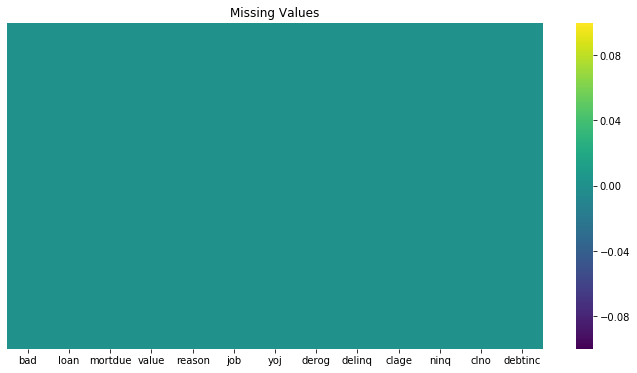

In [17]:
v.missing_values(data)

In [18]:
# DUMMIES

HomeImp = pd.get_dummies(data['reason'], drop_first =True)
jobs = pd.get_dummies(data['job'], drop_first =True)
data=pd.concat([data,HomeImp,jobs],axis=1)
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc,HomeImp,Office,Other,ProfEx,Sales,Self
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056,0,0,0,0,0,0
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079,0,0,0,0,0,0
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459,0,0,0,0,0,0
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,0,0,0,0,0
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108,0,0,0,0,0,0


<ul><li>Kategorik bağımsız değişkenler dummy lere çevrildi</li></ul>

In [19]:
data.drop(['reason','job'],axis =1,inplace=True)
data.head()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,HomeImp,Office,Other,ProfEx,Sales,Self
153,0,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,0,0,0,0,0,0
154,0,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,0,0,0,0,0,0
155,0,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,0,0,0,0,0,0
156,0,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,0,0,0,0,0
157,0,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,0,0,0,0,0,0


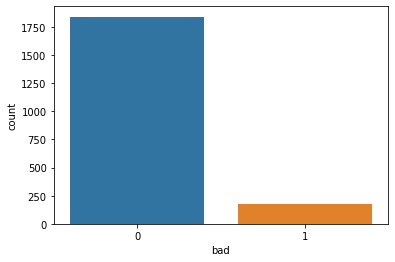

In [20]:
sns.countplot(x = 'bad', data = data)
plt.show()

<ul><li>Bağımlı değişkenin oranı dengesiz görünüyor</li></ul>

In [21]:
X = data.loc[:, data.columns != 'bad']
y = data.loc[:, data.columns == 'bad']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [22]:
# Shapiro

for each in X.columns:
    stat , p = shapiro(X[each])
    if p > 0.5:
        print(colored(each +"  :  Normal dağılımdan(Gaussian) gelmektedir (Fail to Reject Ho)",'green'))
    else:
        print(colored(each+"   :   Normal dağılımdan gelmemektedir",'red'))

loan   :   Normal dağılımdan gelmemektedir
mortdue   :   Normal dağılımdan gelmemektedir
value   :   Normal dağılımdan gelmemektedir
yoj   :   Normal dağılımdan gelmemektedir
derog   :   Normal dağılımdan gelmemektedir
delinq   :   Normal dağılımdan gelmemektedir
clage   :   Normal dağılımdan gelmemektedir
ninq   :   Normal dağılımdan gelmemektedir
clno   :   Normal dağılımdan gelmemektedir
debtinc   :   Normal dağılımdan gelmemektedir
HomeImp   :   Normal dağılımdan gelmemektedir
Office   :   Normal dağılımdan gelmemektedir
Other   :   Normal dağılımdan gelmemektedir
ProfEx   :   Normal dağılımdan gelmemektedir
Sales   :   Normal dağılımdan gelmemektedir
Self   :   Normal dağılımdan gelmemektedir


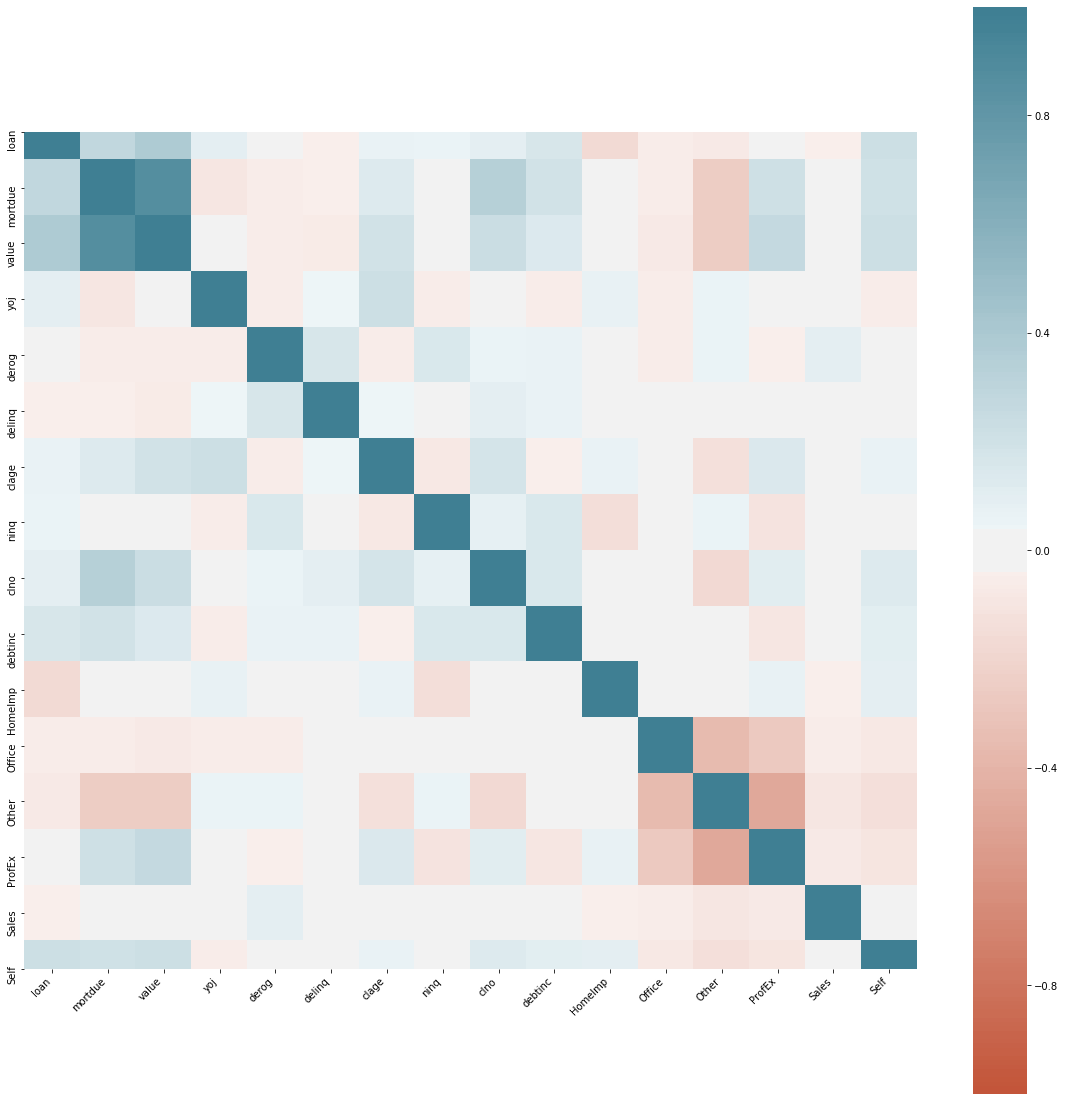

In [23]:
vi = Classes.Visualizer()
vi.corrMatrix(X)

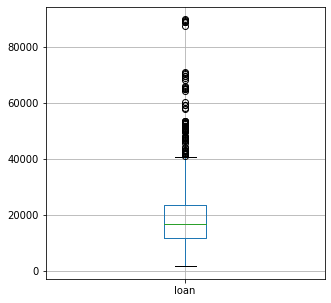

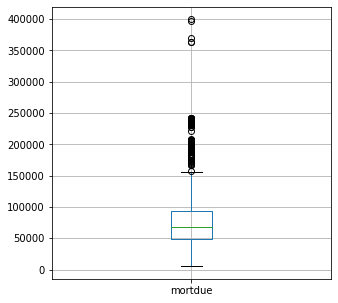

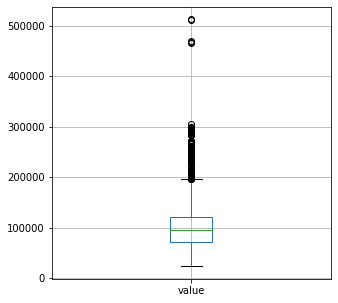

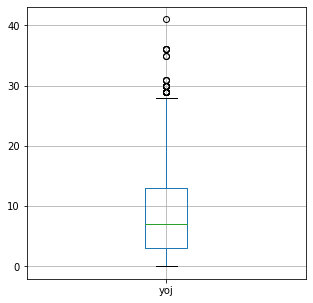

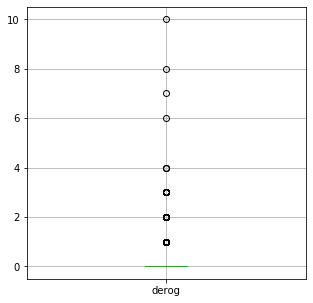

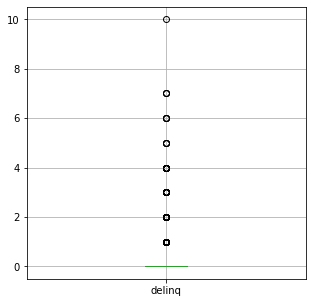

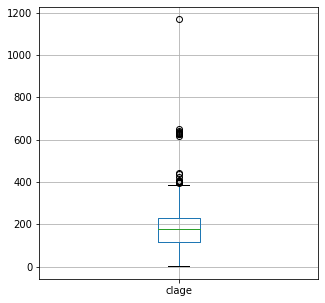

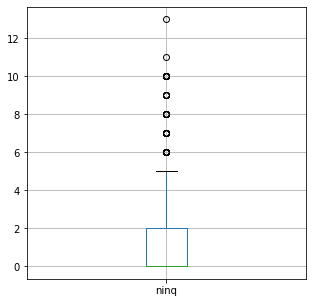

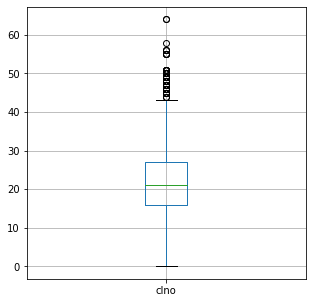

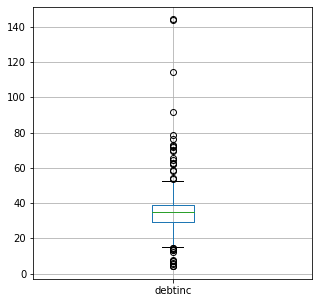

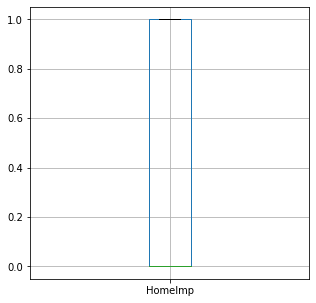

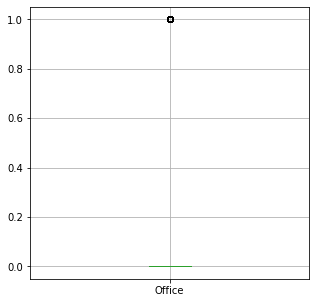

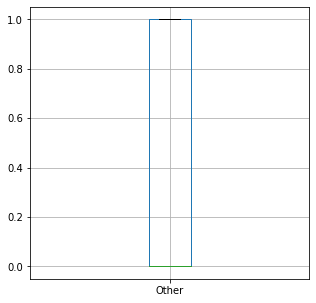

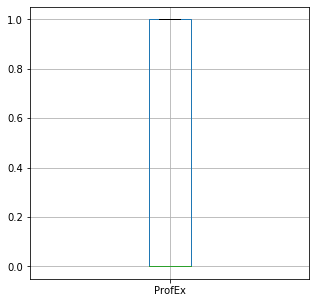

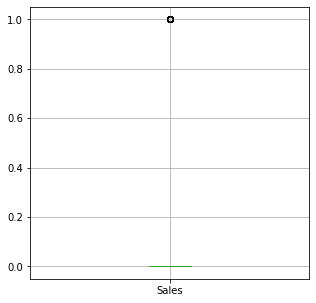

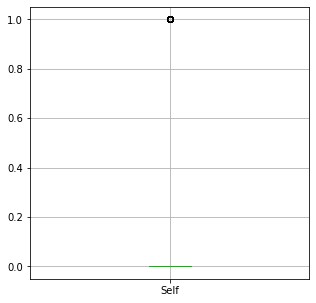

In [24]:
for i in X.columns:
    plt.figure(figsize=(5,5))
    X.boxplot(column = i)
    

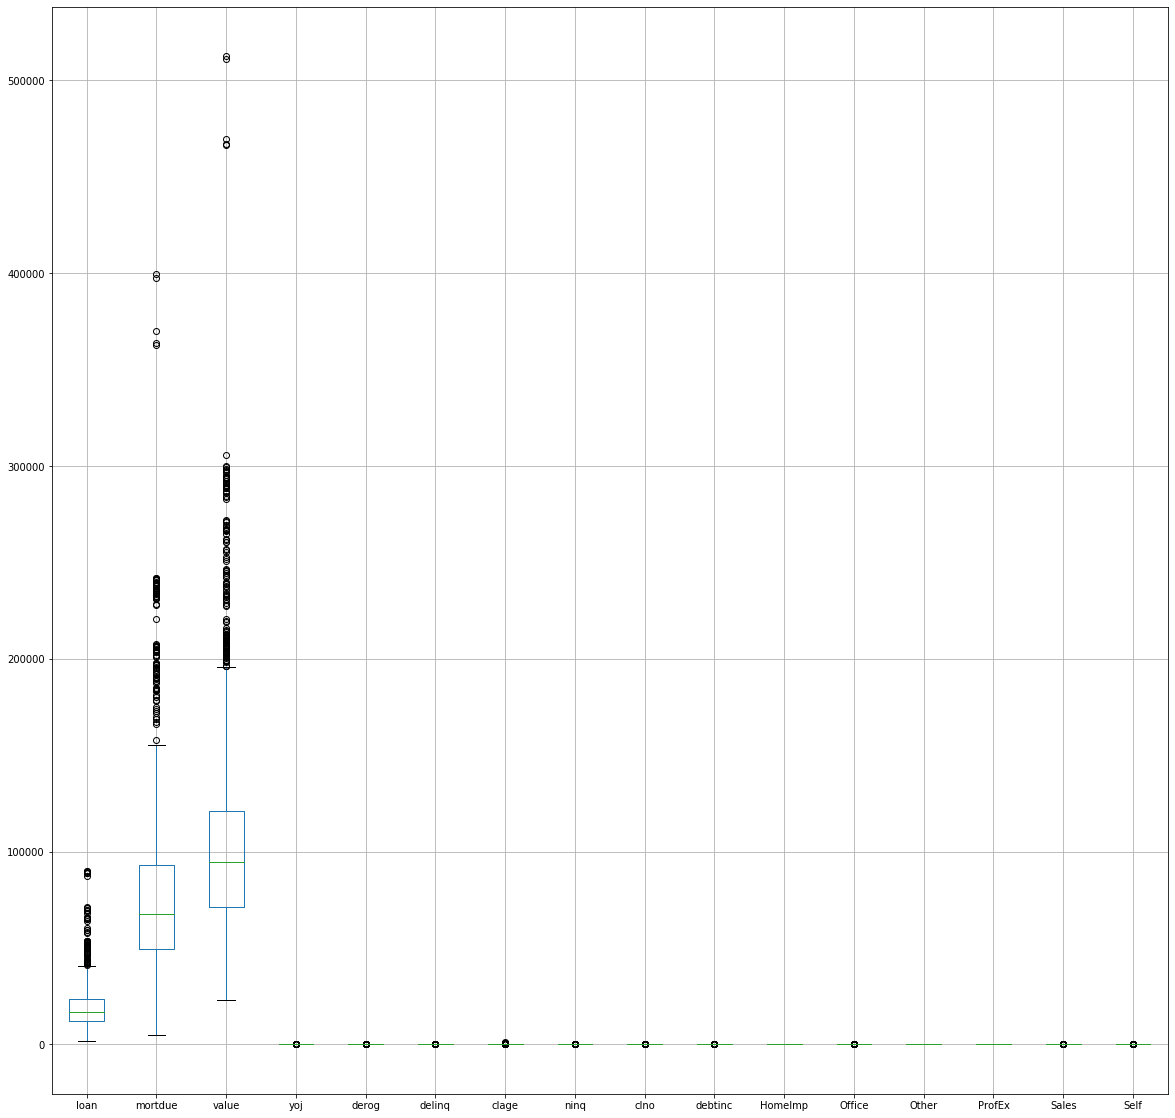

In [25]:
plt.figure(figsize=(20,20))
X.boxplot()

# Logistic Regression

In [26]:
g = Classes.GridSearchHelper()

Grid Search Helper...


------------------     STATS  MODELS  --------------------

Optimization terminated successfully.
         Current function value: 0.254978
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    bad   No. Observations:                 1412
Model:                          Logit   Df Residuals:                     1396
Method:                           MLE   Df Model:                           15
Date:                Sun, 23 Aug 2020   Pseudo R-squ.:                  0.1522
Time:                        08:26:31   Log-Likelihood:                -360.03
converged:                       True   LL-Null:                       -424.68
Covariance Type:            nonrobust   LLR p-value:                 2.915e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -3.704e-05   1.35e-05     -2.748     

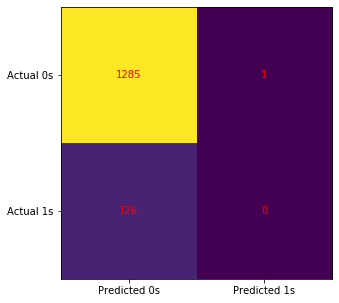

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1286
           1       0.00      0.00      0.00       126

    accuracy                           0.91      1412
   macro avg       0.46      0.50      0.48      1412
weighted avg       0.83      0.91      0.87      1412

Train accuracy score :  0.910056657223796
TEST



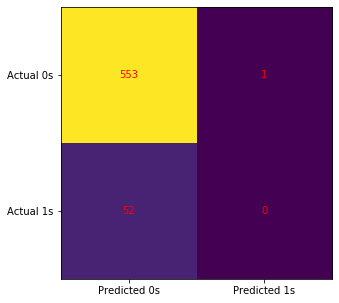

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       554
           1       0.00      0.00      0.00        52

    accuracy                           0.91       606
   macro avg       0.46      0.50      0.48       606
weighted avg       0.84      0.91      0.87       606

Test accuracy score :  0.9125412541254125


In [27]:
log_reg , y_pred = g.LogisticReg(X_train,X_test,y_train,y_test)

### Model Tuning

In [28]:
log_params = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}

In [29]:
tuned_log_reg = g.GridSearchCVM('Logistic',log_reg,log_params,X_train,X_test,y_train, y_test)

En iyi parametresi :{'C': 10, 'penalty': 'l1'}
Tuned Model Accuracy Score :  0.929042904290429


# Decision Tree

TRAIN



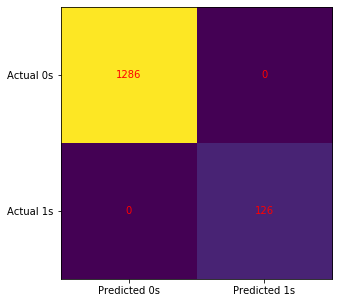

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1286
           1       1.00      1.00      1.00       126

    accuracy                           1.00      1412
   macro avg       1.00      1.00      1.00      1412
weighted avg       1.00      1.00      1.00      1412

Train accuracy score :  1.0
TEST


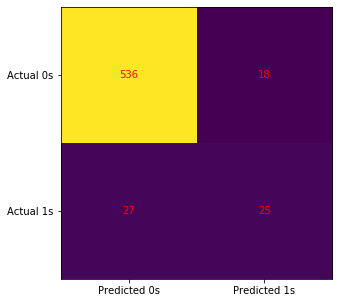

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       554
           1       0.58      0.48      0.53        52

    accuracy                           0.93       606
   macro avg       0.77      0.72      0.74       606
weighted avg       0.92      0.93      0.92       606

Test accuracy score :  0.9257425742574258


In [30]:
decisionTree = g.DecisionTreeCls(X_train,X_test,y_train,y_test)

In [31]:
decisionTree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Model Tuning

In [32]:


cart_grid = {"max_depth": range(4,50),
            "min_samples_split": list(range(2,50)),
             "criterion" : ["gini", "entropy"]}

tuned_decisionTree = g.GridSearchCVM('Decision Tree',decisionTree,cart_grid,X_train,X_test,y_train, y_test)

En iyi parametresi :{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 3}
Tuned Model Accuracy Score :  0.9422442244224423


# Random Forest

TRAIN



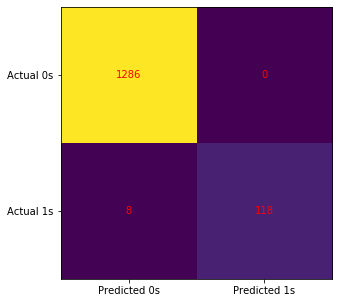

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1286
           1       1.00      0.94      0.97       126

    accuracy                           0.99      1412
   macro avg       1.00      0.97      0.98      1412
weighted avg       0.99      0.99      0.99      1412

Train accuracy score :  0.9943342776203966
TEST


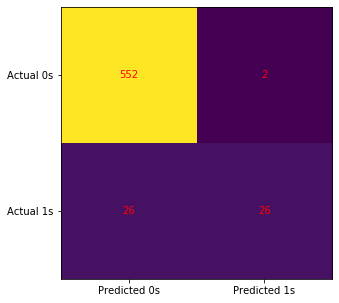

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       554
           1       0.93      0.50      0.65        52

    accuracy                           0.95       606
   macro avg       0.94      0.75      0.81       606
weighted avg       0.95      0.95      0.95       606

Test accuracy score :  0.9537953795379538


In [33]:
randomForest = g.RandomForestCls(X_train,X_test,y_train,y_test)

In [34]:
randomForest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Model Tuning

In [35]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [36]:
tuned_randomForest = g.RandomizedSearchCVM('Random Forest',randomForest,random_grid,X_train,X_test,y_train, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 14.0min finished


En iyi parametresi :{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 56, 'bootstrap': False}
Tuned Model Accuracy Score :  0.9521452145214522


# Neural Network

TRAIN



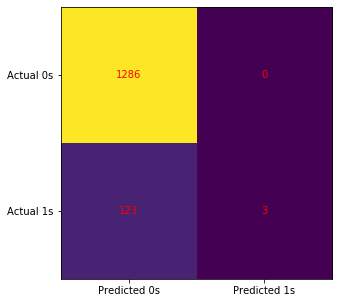

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1286
           1       1.00      0.02      0.05       126

    accuracy                           0.91      1412
   macro avg       0.96      0.51      0.50      1412
weighted avg       0.92      0.91      0.87      1412

Train accuracy score :  0.9128895184135978
TEST


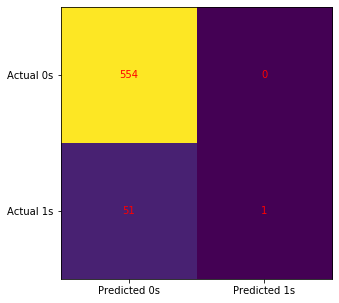

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       554
           1       1.00      0.02      0.04        52

    accuracy                           0.92       606
   macro avg       0.96      0.51      0.50       606
weighted avg       0.92      0.92      0.88       606

Test accuracy score :  0.9158415841584159


In [37]:
nn = g.NeuralNetworkCls(X_train,X_test,y_train,y_test)

In [38]:
nn

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

### Model Tuning

In [39]:
param_grid = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [40]:
tuned_nn = g.GridSearchCVM('Neural Network',nn,param_grid,X_train,X_test,y_train, y_test)

En iyi parametresi :{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
Tuned Model Accuracy Score :  0.9141914191419142


# Naive Bayes

## GaussianNB

TRAIN



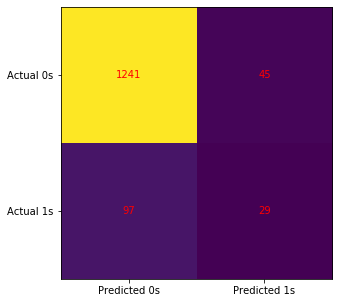

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1286
           1       0.39      0.23      0.29       126

    accuracy                           0.90      1412
   macro avg       0.66      0.60      0.62      1412
weighted avg       0.88      0.90      0.89      1412

Train accuracy score :  0.8994334277620396
TEST


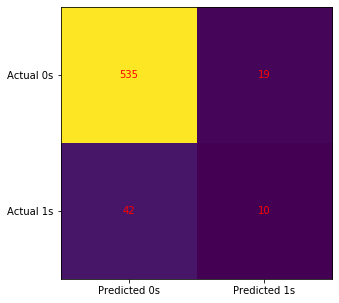

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       554
           1       0.34      0.19      0.25        52

    accuracy                           0.90       606
   macro avg       0.64      0.58      0.60       606
weighted avg       0.88      0.90      0.89       606

Test accuracy score :  0.8993399339933993


In [41]:
gaussian = g.GaussianNBCls(X_train,X_test,y_train,y_test)

In [42]:
gaussian

GaussianNB(priors=None, var_smoothing=1e-09)

### Model Tuning

In [43]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100),
            "priors": [(0.1,0.9),(0.2,0.8),(0.3,0.7),(0.4,0.6)]}

In [44]:
tuned_g = g.GridSearchCVM('GaussianNB',gaussian,params_NB,X_train,X_test,y_train, y_test)

En iyi parametresi :{'priors': (0.4, 0.6), 'var_smoothing': 1e-09}
Tuned Model Accuracy Score :  0.8432343234323433


## BernoulliNB

TRAIN



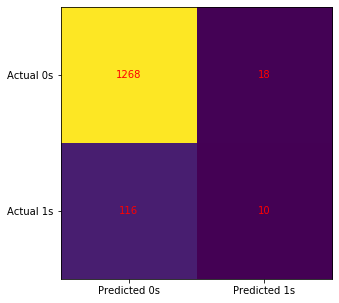

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1286
           1       0.36      0.08      0.13       126

    accuracy                           0.91      1412
   macro avg       0.64      0.53      0.54      1412
weighted avg       0.87      0.91      0.88      1412

Train accuracy score :  0.9050991501416431
TEST


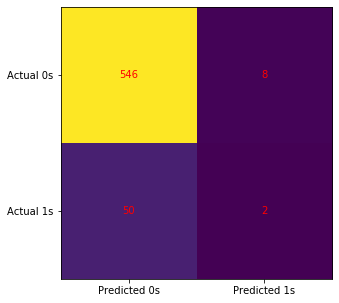

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       554
           1       0.20      0.04      0.06        52

    accuracy                           0.90       606
   macro avg       0.56      0.51      0.51       606
weighted avg       0.85      0.90      0.87       606

Test accuracy score :  0.9042904290429042


In [45]:
bernoulli = g.BernoulliNBCls(X_train,X_test,y_train,y_test)

In [46]:
bernoulli

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

### Model Tuning

In [47]:
bn_params = {'alpha': [0.0001,0.01,0.002,0.007, 0.05]}

In [48]:
tuned_b = g.GridSearchCVM('BernoulliNB',bernoulli,bn_params,X_train,X_test,y_train, y_test)

En iyi parametresi :{'alpha': 0.0001}
Tuned Model Accuracy Score :  0.9026402640264026


# SVM

TRAIN



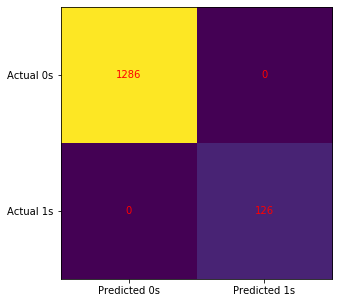

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1286
           1       1.00      1.00      1.00       126

    accuracy                           1.00      1412
   macro avg       1.00      1.00      1.00      1412
weighted avg       1.00      1.00      1.00      1412

Train accuracy score :  1.0
TEST


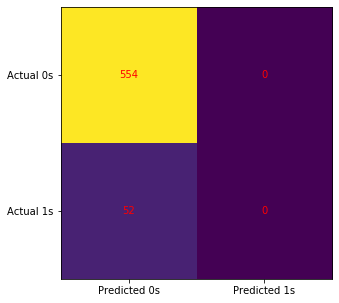

              precision    recall  f1-score   support

           0       0.91      1.00      0.96       554
           1       0.00      0.00      0.00        52

    accuracy                           0.91       606
   macro avg       0.46      0.50      0.48       606
weighted avg       0.84      0.91      0.87       606

Test accuracy score :  0.9141914191419142


In [49]:
svc = g.SVMCls(X_train,X_test,y_train,y_test)

In [50]:
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Model Tuning

In [51]:
params_svc = {'C': [1, 10,15,20],  
            #  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             # "kernel" : ["linear","rbf","poly"]
             }

In [52]:
tuned_svm = g.GridSearchCVM('SVM',svc,params_svc,X_train,X_test,y_train, y_test) 

En iyi parametresi :{'C': 1}
Tuned Model Accuracy Score :  0.9141914191419142


# KNN

TRAIN



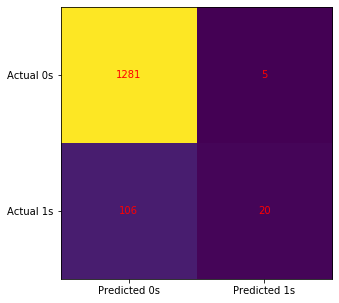

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1286
           1       0.80      0.16      0.26       126

    accuracy                           0.92      1412
   macro avg       0.86      0.58      0.61      1412
weighted avg       0.91      0.92      0.90      1412

Train accuracy score :  0.9213881019830028
TEST


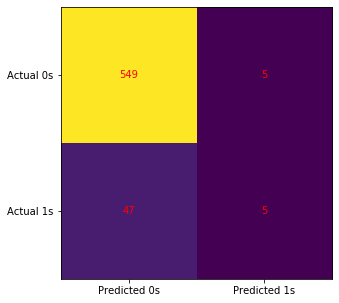

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       554
           1       0.50      0.10      0.16        52

    accuracy                           0.91       606
   macro avg       0.71      0.54      0.56       606
weighted avg       0.89      0.91      0.89       606

Test accuracy score :  0.9141914191419142


In [53]:
knn = g.KNNCls(X_train,X_test,y_train,y_test)

In [54]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Model Tuning

In [55]:
params_knn = {"n_neighbors": np.arange(1,15),
         "metric" :["minkowski", "euclidean","manhattan"]}

In [56]:
tuned_knn = g.GridSearchCVM('KNN',knn,params_knn,X_train,X_test,y_train, y_test)

En iyi parametresi :{'metric': 'minkowski', 'n_neighbors': 14}
Tuned Model Accuracy Score :  0.9174917491749175


# All Scores

In [57]:
g.AllScores()

,Train,Test,Tuned
Logistic,0.910057,0.912541,0.929043
Decision Tree,1,0.925743,0.942244
Random Forest,0.994334,0.953795,0.952145
Neural Network,0.91289,0.915842,0.914191
SVM,1,0.914191,0.914191
BernoulliNB,0.905099,0.90429,0.90264
GaussianNB,0.899433,0.89934,0.843234
MultinomialNB,NaN,NaN,NaN
KNN,0.921388,0.914191,0.917492
